In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


In [7]:
# Inisialisasi StopWordRemover dan Stemmer
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

# stopward
def preprocess_text(text):
    # Menghapus stopword
    text_no_stopwords = stopword_remover.remove(text)
    # Melakukan stemming
    text_stemmed = stemmer.stem(text_no_stopwords)
    return text_stemmed

# non-stopward
# def preprocess_text(text):
#     # Langsung melakukan stemming tanpa menghapus stopword
#     return stemmer.stem(text)

In [8]:
# Muat data dari file Excel
data = pd.read_excel('REVIEW KEBIJAKAN MBG.xlsx')

# Pra-pemrosesan teks
data['text'] = data['text'].apply(preprocess_text)

# 🔁 Mapping label sentimen ke angka
label_mapping = {'Netral': 0, 'Positif': 1, 'Negatif': 2}
data['sentiment'] = data['sentiment'].map(label_mapping)

# Misalnya data memiliki kolom 'text' untuk teks dan 'sentiment' untuk label sentimen
texts = data['text']
sentiments = data['sentiment']

# Split data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(texts, sentiments, test_size=0.3, random_state=42)


In [9]:
# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Fit dan transform data pelatihan
X_train_counts = vectorizer.fit_transform(X_train)

# Transform data uji
X_test_counts = vectorizer.transform(X_test)

In [10]:
from sklearn.svm import SVC

# Inisialisasi 
model = SVC(kernel='linear')

# Latih model
model.fit(X_train_counts, y_train)

# Prediksi sentimen untuk data uji
predictions = model.predict(X_test_counts)

In [11]:
# Menampilkan hasil evaluasi
print("Evaluasi Model (SVM) dengan Stopword:")
print(classification_report(y_test, predictions))

# Menampilkan beberapa hasil prediksi
print("\nBeberapa hasil prediksi:")
for text, sentiment in zip(X_test, predictions):
    print(f'Teks: {text}\nPrediksi Sentimen: {sentiment}\n')

# Ekspor hasil prediksi ke file Excel
results = pd.DataFrame({'text': X_test, 'predicted_sentiment': predictions})
results.to_excel('predictions(SVM)non-sw.xlsx', index=False)

print("Hasil prediksi (SVM) telah diekspor ke 'predictions(SVM).xlsx'.")

results = pd.DataFrame({'text': X_test, 'true_sentiment': y_test, 'predicted_sentiment': predictions})
results.to_excel('predictions-true(SVM)non-sw.xlsx', index=False)

print("Hasil prediksi (SVM) telah diekspor ke 'predictions-true(SVM).xlsx'.")


Evaluasi Model (SVM) dengan Stopword:
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.76      0.90      0.83        21
           2       0.87      0.87      0.87        30

    accuracy                           0.83        60
   macro avg       0.88      0.78      0.80        60
weighted avg       0.85      0.83      0.83        60


Beberapa hasil prediksi:
Teks: gizi gimana nanti apa cuma asal kenyang
Prediksi Sentimen: 2

Teks: lah bukan lebih penting baik kualitas guru sama fasilitas sekolah makan siang oke kalo guru kurang kompeten sama aja boong dong prioritas kok gin sih
Prediksi Sentimen: 2

Teks: jangan program cuma jadi ajang korupsi jamaah
Prediksi Sentimen: 2

Teks: kalo makan enak bakal banyak yg makan
Prediksi Sentimen: 2

Teks: transparansi anggar kunci
Prediksi Sentimen: 2

Teks: ini langkah nyata putus mata rantai miskin
Prediksi Sentimen: 1

Teks: investasi baik buat generasi datang
Pr

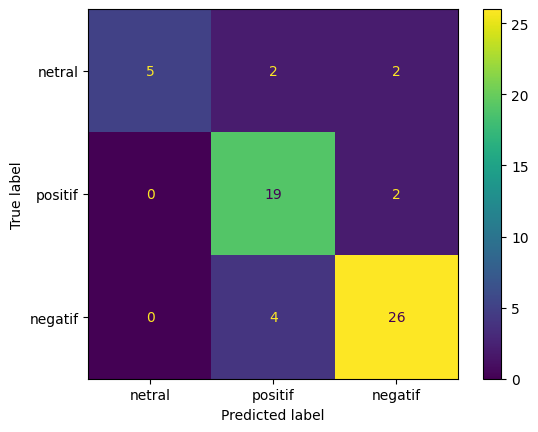

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test_counts) 
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['netral', 'positif', 'negatif'])
disp.plot()


In [13]:
# Fungsi untuk menganalisis teks baru
def analyze_text(text):
    preprocessed = preprocess_text(text)
    text_counts = vectorizer.transform([preprocessed])
    return model.predict(text_counts)[0]

# Menganalisis teks dari input pengguna
while True:
    user_input = input("\nMasukkan teks untuk analisis sentimen (atau ketik 'x' untuk keluar): ")
    if user_input.lower() == 'x':
        break
    sentiment = analyze_text(user_input)
    print(f'Prediksi Sentimen (SVM) untuk "{user_input}": {sentiment}')
